In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
data['User_ID'] = le.fit_transform(data['User_ID'])
print("User_ID", le.classes_)
data['Product_ID'] = le.fit_transform(data['Product_ID'])
print("Product_ID", le.classes_)
data['Gender'] = le.fit_transform(data['Gender'])
print("Gender", le.classes_)
data['Age'] = le.fit_transform(data['Age'])
print("Age", le.classes_)
data['City_Category'] = le.fit_transform(data['City_Category'])
print("City_Category", le.classes_)

User_ID [1000001 1000002 1000003 ... 1006038 1006039 1006040]
Product_ID ['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']
Gender ['F' 'M']
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
City_Category ['A' 'B' 'C']


In [11]:
data['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [12]:
data['User_ID'].unique()

array([   0,    1,    2, ..., 4008, 5253, 1484], dtype=int64)

In [13]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [14]:
#Changing 4+ to 4
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', '4')

In [15]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int32  
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(5), int64(5)
memory usage: 39.9 MB


In [17]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [18]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [19]:
#Since the data is large in size, dropping the null values
data = data.dropna()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  int32  
 2   Gender                      166821 non-null  int32  
 3   Age                         166821 non-null  int32  
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  int32  
 6   Stay_In_Current_City_Years  166821 non-null  int32  
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int32(5), int64(5)
memory usage: 13.4 MB


In [21]:
data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
6,3,1745,1,4,7,1,2,1,1,8.0,17.0,19215
13,4,1355,1,2,20,0,1,1,1,2.0,5.0,15665
14,5,2203,0,5,9,0,1,0,5,8.0,14.0,5378
16,5,3598,0,5,9,0,1,0,2,3.0,4.0,13055
18,6,362,1,3,1,1,1,1,1,14.0,16.0,11788
19,7,2382,1,2,12,2,4,1,1,5.0,15.0,19614
24,7,2909,1,2,12,2,4,1,1,8.0,14.0,11927
28,8,765,1,2,17,2,0,0,5,8.0,14.0,5391
29,9,833,0,3,1,1,4,1,2,4.0,8.0,16352


In [22]:
#Five point summary
data.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
mean,2956.922258,1471.491683,0.774645,2.455153,8.178886,1.087159,1.861690,0.402839,2.742766,6.896871,12.668243,11658.114980
std,1690.553079,942.668323,0.417817,1.335119,6.487522,0.759824,1.284791,0.490470,2.573969,4.500288,4.125338,5082.287959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1478.000000,745.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7869.000000
50%,3019.000000,1334.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,1.000000,6.000000,14.000000,11756.000000
75%,4367.000000,2106.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15626.000000
max,5890.000000,3630.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


In [23]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

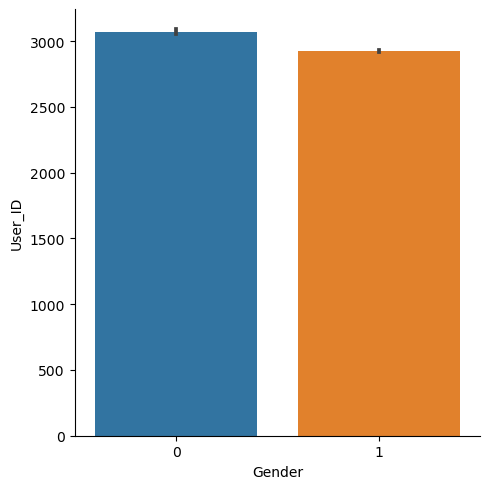

In [24]:
#visualizations to understand the distribution of the various features
#catplot=categorical plot
sns.catplot(data=data, x='Gender', y='User_ID', kind='bar')

### Amongst all the purchases made, majority of the purchases were made by Women/Female

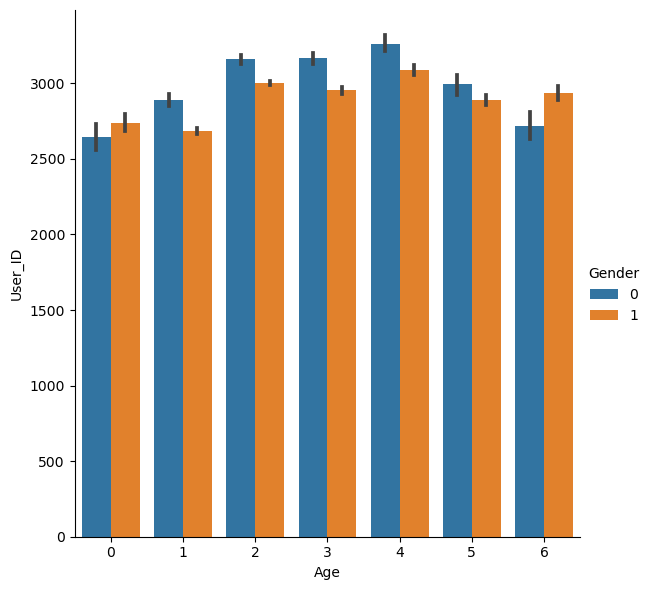

In [25]:
sns.catplot(data=data, x='Age', y='User_ID', hue='Gender', kind='bar', height=6)

Inferences:

1. The most frequent purchases came from the females having user ids that belong to age category 4(46-50)
2. The least frequent purchases came from the males of the age category 1(18-25), and females of age category 0(0-17)

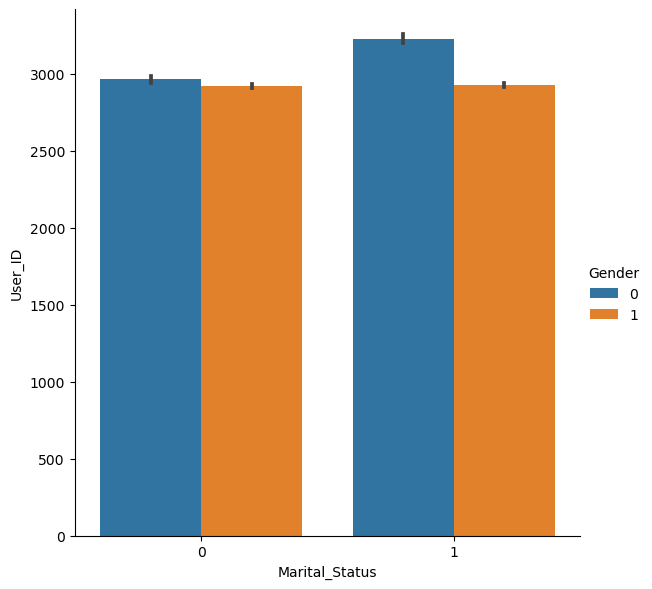

In [26]:
sns.catplot(data=data, x='Marital_Status', y='User_ID', hue='Gender', kind='bar', height=6)

In [27]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### The gender ratio in unmarried customers is almost similar, whereas the married customers have a slightly higer number of females in the lot

In [28]:
data['Product_Category_1']

1         1
6         1
13        1
14        5
16        2
         ..
545902    3
545904    6
545907    2
545908    1
545914    1
Name: Product_Category_1, Length: 166821, dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  int32  
 2   Gender                      166821 non-null  int32  
 3   Age                         166821 non-null  int32  
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  int32  
 6   Stay_In_Current_City_Years  166821 non-null  int32  
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int32(5), int64(5)
memory usage: 13.4 MB


<Axes: xlabel='Product_Category_1', ylabel='count'>

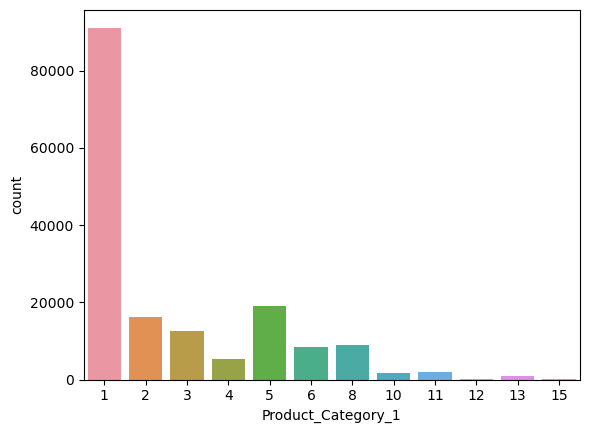

In [30]:
sns.countplot(data=data,x=data['Product_Category_1'])

The Product_Category_1 sees a great rise of Product Category 1 and diminishes with the other products. The other considerable categories are 5,2,3,6,8, etc

<Axes: xlabel='Product_Category_2', ylabel='count'>

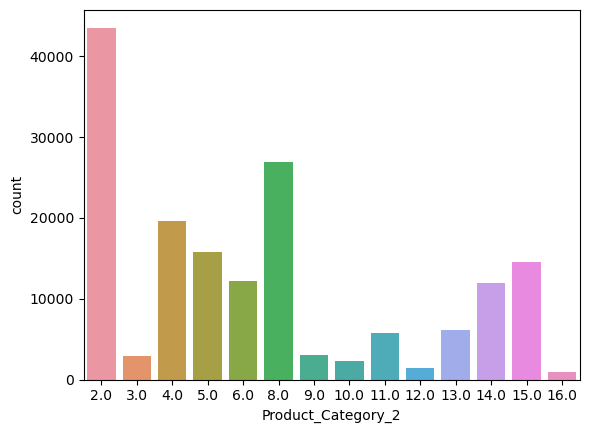

In [31]:
sns.countplot(data=data,x=data['Product_Category_2'])

Product_Category_2 sees a considerable balance among categories. With category 2 topping the charts, and other considerable categories are 8, 4,5,6,14,15,etc

<Axes: xlabel='Product_Category_3', ylabel='count'>

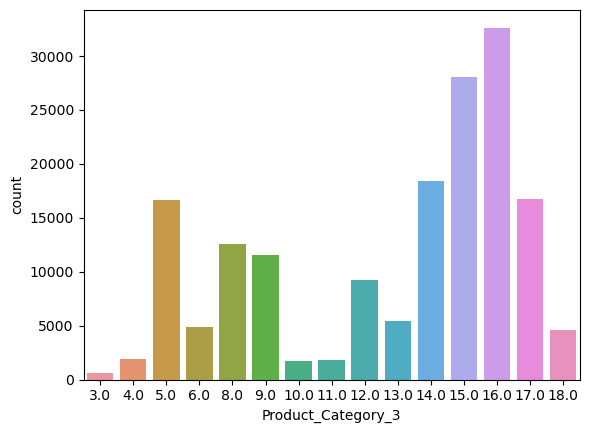

In [32]:
sns.countplot(data=data,x=data['Product_Category_3'])

Product_Category_3 sees a considerable balance in towards the end with 16 topping the charts and other considerable categories are 15,14,5,8,9,17,etc

<Axes: xlabel='Occupation', ylabel='count'>

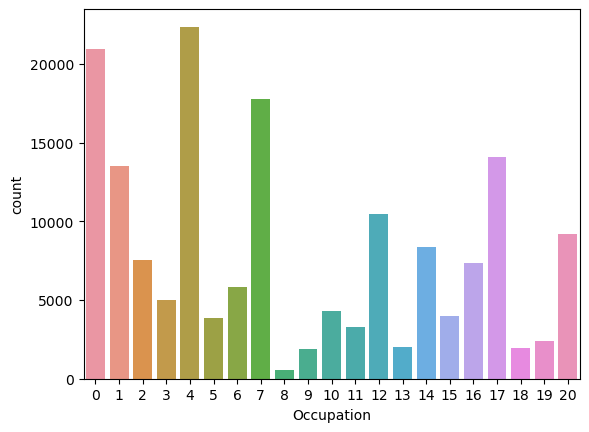

In [33]:
sns.countplot(data=data,x=data['Occupation'])

Occupation sees a constant balance among categories with 4 topping the chart,and other considerable amount with 1,1,2,7,12,17,20.

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

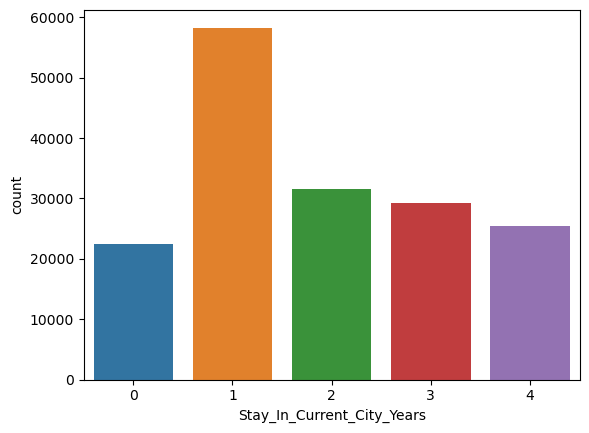

In [34]:
sns.countplot(data=data,x=data['Stay_In_Current_City_Years'])

Majority of the customers have stayed a year in the city

C:\Users\Jasmine Ansari\AppData\Local\Temp\ipykernel_7604\1982183297.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Purchase'])


<Axes: xlabel='Purchase', ylabel='Density'>

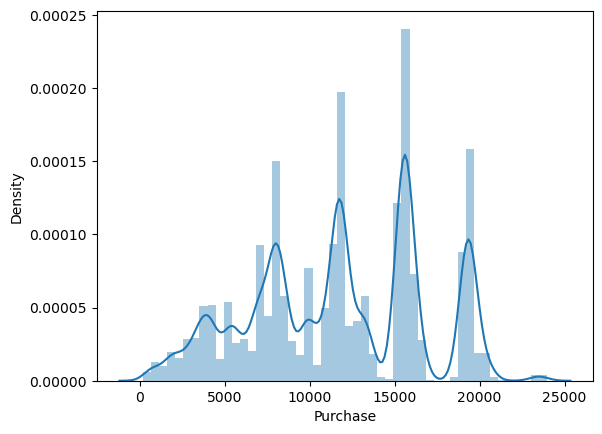

In [35]:
#Distplot= distribution plot
sns.distplot(data['Purchase'])

Purchases is not accumulated in a range, rather varies in different intervals

In [36]:
#Checking the correlation of the features
corr_spearman = data.corr()
corr_pearson = data.corr(method='pearson')
corr_kendall = data.corr(method='kendall')

C:\Users\Jasmine Ansari\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<Axes: >

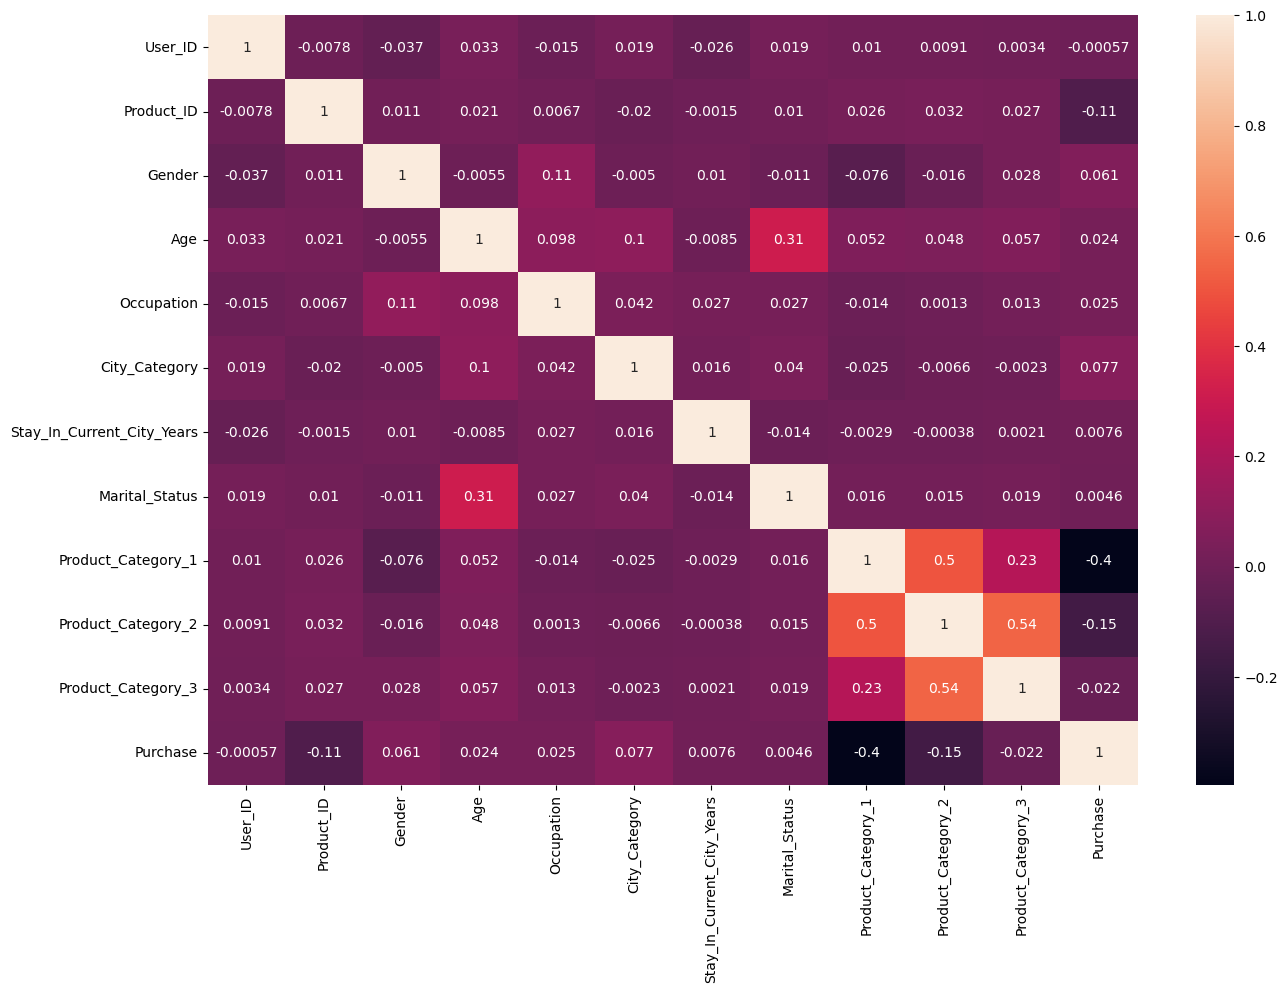

In [37]:
#Spearman corr
plt.figure(figsize=(15,10))
sns.heatmap(corr_spearman,annot=True)

<Axes: >

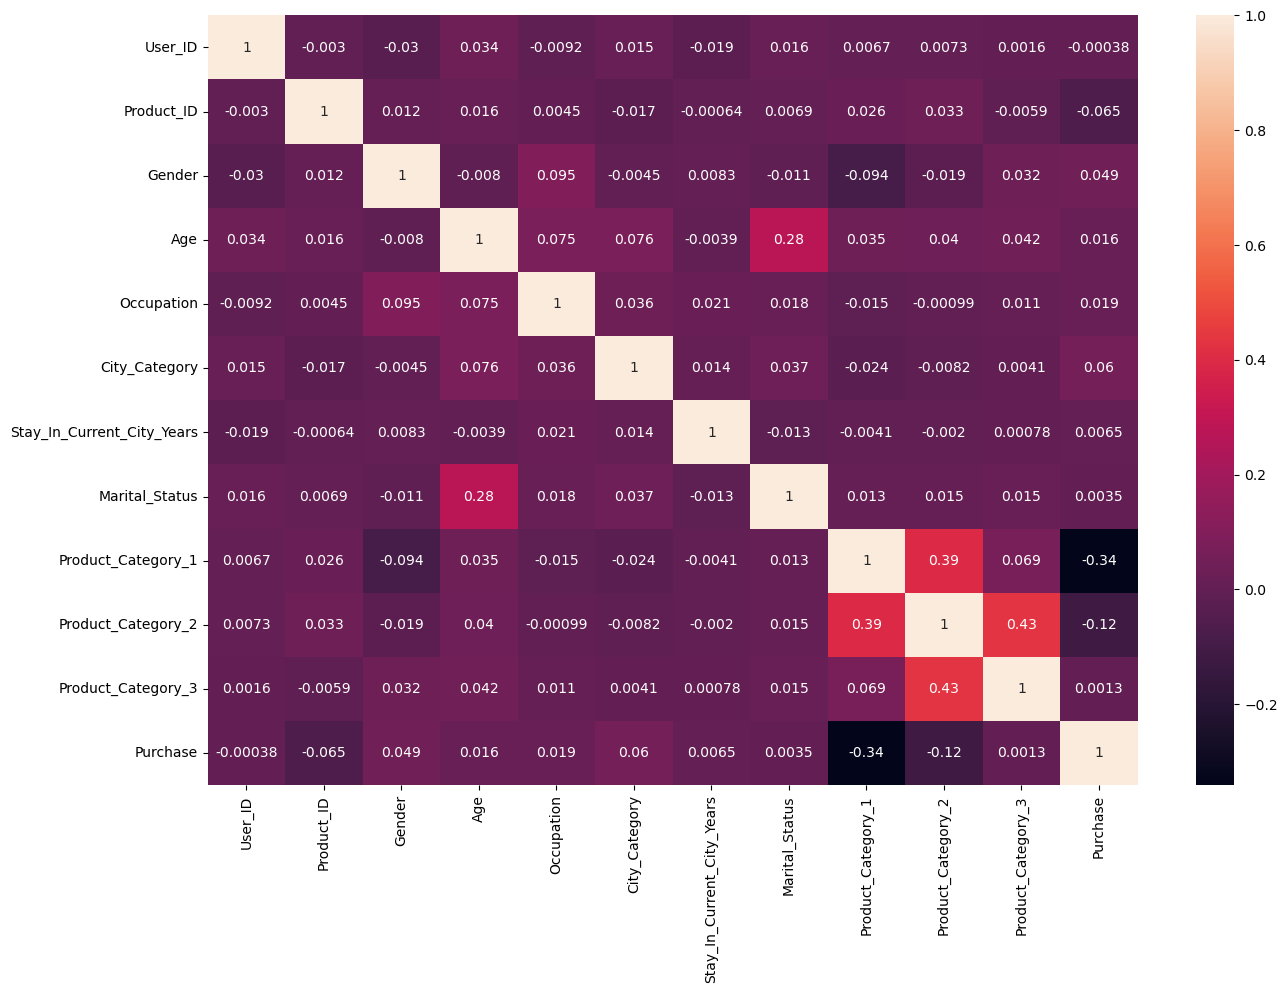

In [38]:
#Kendall corr
plt.figure(figsize=(15,10))
sns.heatmap(corr_kendall,annot=True)

<Axes: >

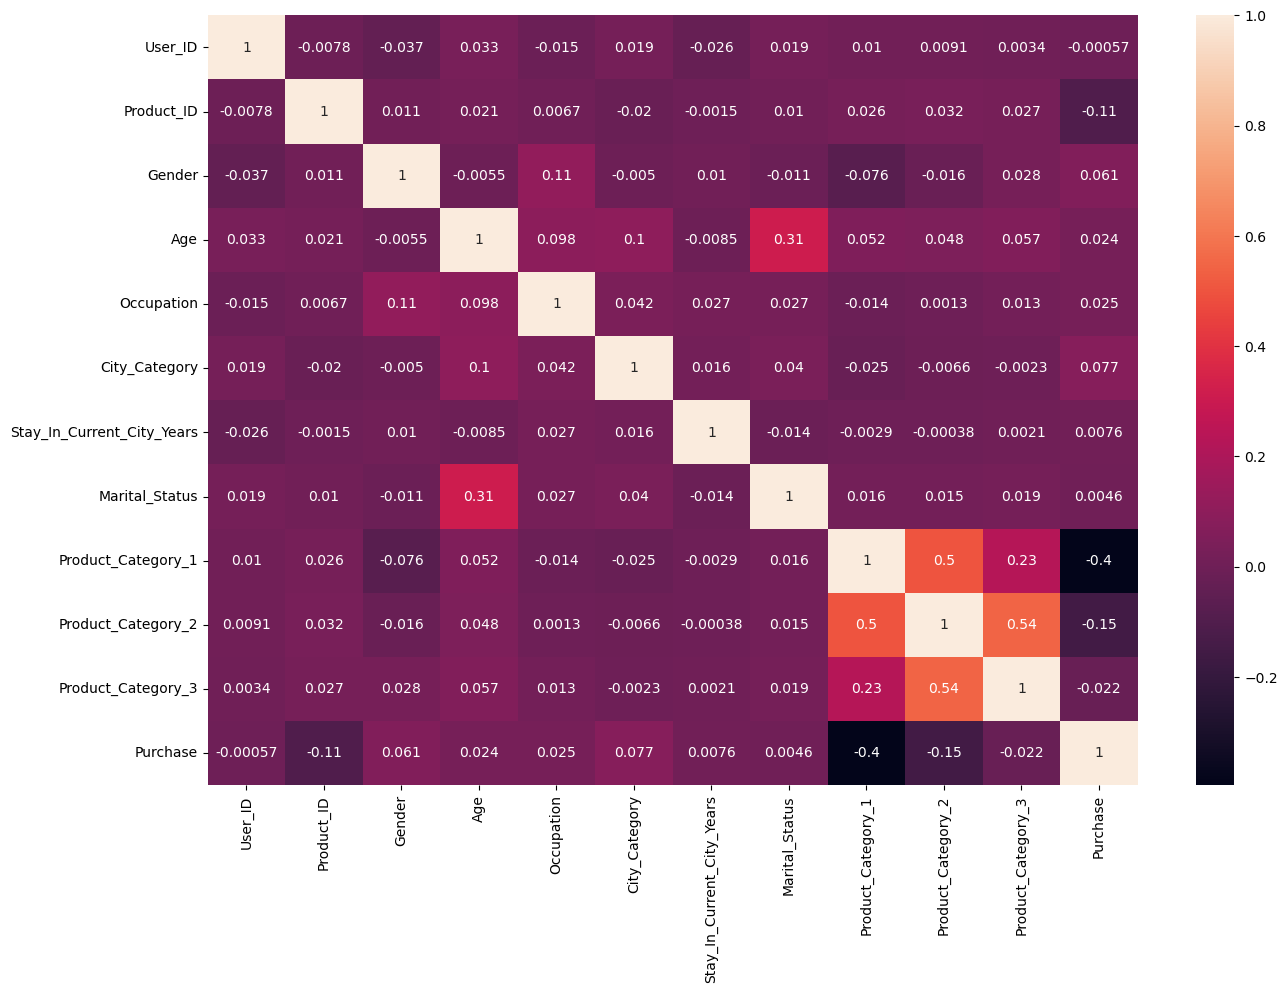

In [39]:
#Pearson corr
plt.figure(figsize=(15,10))
sns.heatmap(corr_pearson, annot=True)

# Statistical Analysis

### One Sample Test for Mean

Lets suppose, it was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?

In [40]:
#h0= The mean is 10000
#ha= The mean is not 10000

In [41]:
new_data = data.loc[(data['Age']==1) & data['Gender'] == 1]

In [42]:
new_data.shape

(24239, 12)

In [43]:
new_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
98,21,3370,1,1,15,0,4,0,1,8.0,17.0,12099
103,21,2507,1,1,15,0,4,0,1,11.0,16.0,12098
111,21,2150,1,1,15,0,4,0,2,4.0,15.0,9564
127,24,1957,1,1,4,2,4,0,1,5.0,9.0,15361
128,24,458,1,1,4,2,4,0,1,2.0,15.0,15770


In [44]:
sample_size = 1000
sample = new_data.sample(sample_size, random_state=0)

In [45]:
pos_mean = 10000

In [46]:
sample_mean = sample['Purchase'].mean()
print(sample_mean)

11806.467


In [47]:
#One sample t-test
from scipy.stats import ttest_1samp

In [48]:
t_test, p_value = ttest_1samp(sample['Purchase'],pos_mean)
print(t_test, p_value)

11.215158056527494 1.4097545140748985e-27


In [49]:
#P-value is less than 0.05, reject the null hypothesis
#Therefore, the mean purchase for men aged 18-25 is not 10000

# One Sample Test for Proportion

Lets Suppose, It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?

In [50]:
#h0= Proportion is 35%
#ha= Proportion is not 35%

In [51]:
data_new= data.loc[(data['Purchase'] > 10000)]

In [52]:
data_new.shape

(102477, 12)

In [53]:
data_new.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
6,3,1745,1,4,7,1,2,1,1,8.0,17.0,19215
13,4,1355,1,2,20,0,1,1,1,2.0,5.0,15665
16,5,3598,0,5,9,0,1,0,2,3.0,4.0,13055
18,6,362,1,3,1,1,1,1,1,14.0,16.0,11788


In [56]:
data_new['Gender'].value_counts()

1    81353
0    21124
Name: Gender, dtype: int64

In [54]:
#No. of women in the sample
count = data_new['Gender'].value_counts()[0]

#No. of observations(total)
nobs = len(data_new['Gender'])

#hypothesized value
p0 = 0.35

In [55]:
print(count)

21124


In [57]:
data_new['Gender'].value_counts()/nobs

1    0.793866
0    0.206134
Name: Gender, dtype: float64

In [58]:
#One sample Z test
from statsmodels.stats.proportion import proportions_ztest

In [61]:
z_stat, p_val = proportions_ztest(count=count,
                                nobs=nobs,
                                value=p0,
                                alternative='two-sided',
                                prop_var=False)
print(z_stat, p_val)

-113.84729816907917 0.0


In [62]:
#p-vaue is less than 0.05, reject null hypothesis
#the proportion of women spending more than 10000 is not 35%

### Two Sample test for Means

Is the average purchase made by men and women of the age 18-25 same?

In [63]:
#null hypothesis - average spends are equal
#alternate hypothesis - average spends are not equal

In [70]:
data_men = data.loc[(data['Gender'] == 1)& (data['Age'] == 1)]
data_women = data.loc[(data['Gender'] == 0 ) & (data['Age'] == 1)]

In [78]:
data_men.shape

(24239, 12)

In [79]:
data_women.shape

(7077, 12)

In [73]:
#Creating Samples
data_men_samples = data_men.sample(500,random_state=0)
data_women_samples = data_women.sample(500, random_state=0)

In [76]:
#Checking variances of the two samples
print(data_men_samples.Purchase.var())
print(data_women_samples.Purchase.var())

25667399.361122195
25521524.106817614


In [77]:
#Sample means
print(data_men_samples.Purchase.mean())
print(data_women_samples.Purchase.mean())

11767.16
10829.414


In [81]:
#computing f statistic
from scipy.stats import f
F=data_men_samples.Purchase.mean()/data_women_samples.Purchase.mean()
print(F)

1.0865924970640146


In [83]:
#Calculating the degree of freedom
df1 = len(data_men_samples) - 1
df2 = len(data_women_samples) -1

print(df1,df2)

499 499


In [84]:
#p value
import scipy
scipy.stats.f.cdf(F,df1,df2)

0.8230271634096517

In [85]:
#the p-value is greater than 0.05, do not reject the null hypothesis.
#The average purchases are same

In [87]:
#2 sample t-test for unequal variances
from scipy.stats import ttest_ind

t_stat_2, p_val_2= ttest_ind(data_men_samples.Purchase, data_women_samples.Purchase, equal_var=False)
print(t_stat_2, p_val_2)

2.930773286720701 0.0034582632769889553


In [88]:
#we can reject h0 using test statistic and since pvalue is less than 0.5
#The average purchases are not the same

### Two sample test for population

Is the percentage of men who have spend more than 10000 same for the ages 18-25 and 26-35

In [89]:
#h0 = percentage of men in the age groups is same
#ha = percentage of men in the age groups is not the same

In [90]:
data_age1 = data.loc[(data['Age'] == 1) & (data['Purchase']>10000)]
data_age2 = data.loc[(data['Age'] == 2) & (data['Purchase']>10000)]

In [91]:
data_age2.shape

(40994, 12)

In [92]:
data_age1.shape

(19262, 12)

In [93]:
data_age1_sample = data_age1.sample(1000, random_state=0)
data_age2_sample = data_age2.sample(1000, random_state=0)

In [94]:
count = [(data_age1_sample['Gender']==1).sum(), (data_age2_sample['Gender']==1).sum()]

nobs = [(len(data_age1_sample)), len(data_age2_sample)]

In [98]:
from statsmodels.stats.proportion import proportions_ztest

stats_2sample, p_value_2sample = proportions_ztest(count=count,
                                                  nobs=nobs,
                                                  value=0,
                                                  alternative='two-sided',
                                                  prop_var=False)

In [100]:
print(stats_2sample, p_value_2sample)

-1.5165009817767297 0.12939272225896914


In [101]:
#p value is more 0.05, cannot reject the null hypothesis.
#Therefore, percentage of the men in the age groups is same.